<h1 align=center>Houses' Pricing in Boston MA</h1>
<h2>Project Scenario</h2>

AS a Data Scientist working with a housing agency in Boston MA, an access was given to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management.

Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## About the dataset
This data was modified for this course and the link to the complete dataset can be found in the [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) library.
The following describes the dataset variables:

* **CRIM** - per capita crime rate by town

* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

* **INDUS** - proportion of non-retail business acres per town.

* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* **NOX** - nitric oxides concentration (parts per 10 million)

* **RM** - average number of rooms per dwelling

* **AGE** - proportion of owner-occupied units built prior to 1940

* **DIS** - weighted distances to five Boston employment centres

* **RAD** - index of accessibility to radial highways

* **TAX** - full-value property-tax rate per $10,000

* **PTRATIO** - pupil-teacher ratio by town

* **LSTAT** - % lower status of the population

* **MEDV** - Median value of owner-occupied homes in $1000's

## Load the Dataset

In [1]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [2]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
boston_df.shape

(506, 14)

## Visualizations
### Median value of owner-occupied homes

[Text(0.5, 0, 'Median Values'),
 Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")]

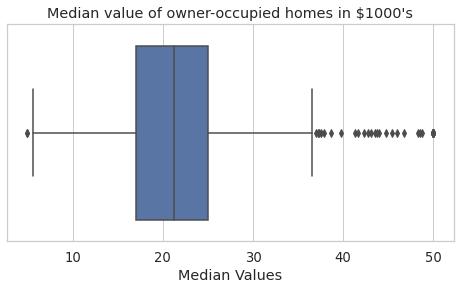

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(8,4))

ax = sns.boxplot(x = boston_df['MEDV'])
ax.set(xlabel='Median Values', title='Median value of owner-occupied homes in $1000\'s')

*The median values of houses are distributed around 5 and 37 thousands dollars with a median value around 22 thousand dollars. So many extreme values appeared above the maximum value which should be considered in further analysis.* 

### The Charles river variable

Text(0.5, 1.0, 'Bar Plot of Number of Towns Bounded by the Charles River')

<Figure size 576x288 with 0 Axes>

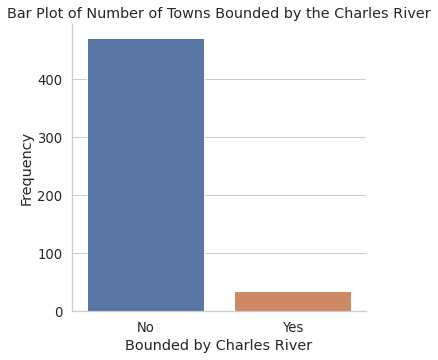

In [5]:
plt.figure(figsize=(8,4))

ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(xlabel = 'Bounded by Charles River', ylabel='Frequency', xticklabels=['No', 'Yes'])
plt.title(label='Bar Plot of Number of Towns Bounded by the Charles River')

*The bar plot shows a huge different between the number of towns bounded or not-bounded by the river.**

### The MEDV variable vs the AGE variable

In [6]:
# Discretization of the age variable into three groups
def disc_age(x):
    if x >= 70 : y = '70 years and older'
    elif x > 35 : y = 'between 35 and 70 years'
    else : y = '35 years and younger'
    return y

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(disc_age)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


[Text(0, 0.5, 'Median Value'),
 Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Box Plot of the Median Value of Owner-occupied Homes vs Proportion of Units Built Prior to 1940')]

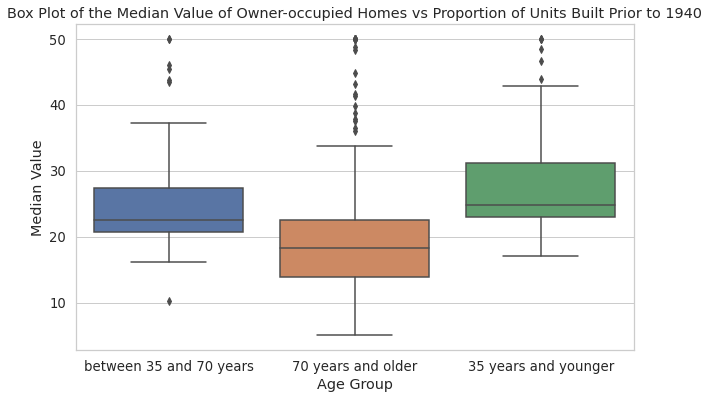

In [7]:
plt.figure(figsize=(10,6))

ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax.set(xlabel = 'Age Group', ylabel='Median Value', \
       title='Box Plot of the Median Value of Owner-occupied Homes vs Proportion of Units Built Prior to 1940')

*From this box plot, we observe that 75% of houses older than 70 years are less valued than 75% of newest houses (younger than 35 years) and 50% of the mid-aged houses (between 35 and 70 years).*

### The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Scatter Plot of the Relationship Between Nitric Oxide Concentrations and The Proportion of Non-Retail Business')

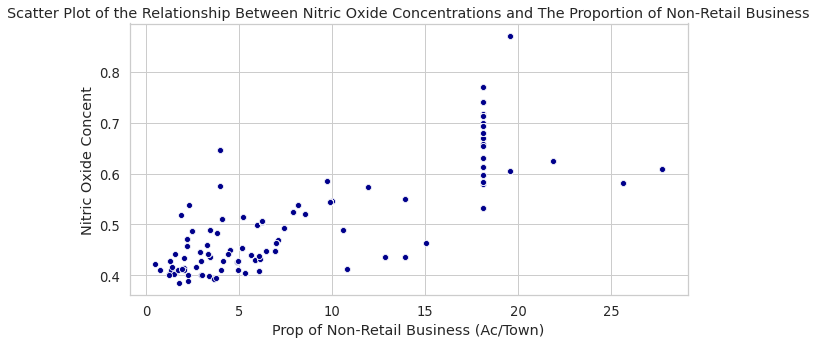

In [8]:
plt.figure(figsize=(10,5))

ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='darkblue')
ax.set(xlabel = 'Prop of Non-Retail Business (Ac/Town)', ylabel='Nitric Oxide Concent')
plt.title(label='Scatter Plot of the Relationship Between Nitric Oxide Concentrations and The Proportion of Non-Retail Business')

*From the scatter plot, we can say that there's a positive relationship between the concentration of the Nitric Oxide in the air and the proportion of non-retail business acres per town. As the proprtion goes up, the concentration increases.*
### The pupil to teacher ratio variable

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Pupil-Teacher Ratio'),
 Text(0.5, 1.0, 'Distribution of Pupil-Teacher Ratio by Town')]

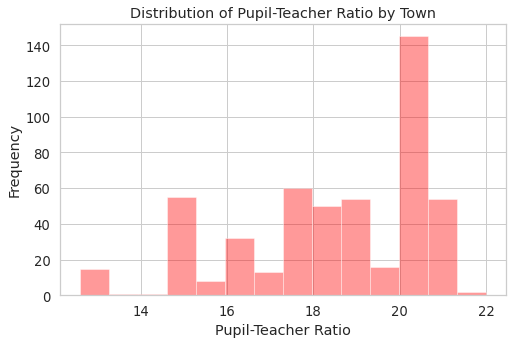

In [9]:
plt.figure(figsize=(8,5))

ax = sns.distplot(boston_df['PTRATIO'], kde=False, color='red')
ax.set(xlabel = 'Pupil-Teacher Ratio', ylabel='Frequency', title='Distribution of Pupil-Teacher Ratio by Town')

*The distribution of the pupil to teacher ration by town is left skewed, and we observe the interval between 20 and 21.5 has is the most frequent.*

## Hypothesis Testing
### Is there a significant difference in median value of houses bounded by the Charles river or not? 
- H0 : μ1 = μ2 (There's no difference in means of the median value of houses bounded or not-bounded by the Charles river)
- Ha : μ1 ≠ μ2 (There's a difference in means of the median value of houses bounded or not-bounded by the Charles river)

In [10]:
from scipy import stats

# separate groups
bounded_val = boston_df[boston_df['CHAS'] == 1]['MEDV']
notbounded_val = boston_df[boston_df['CHAS'] == 0]['MEDV']

# test for equal variances assumption
stats.levene(bounded_val, notbounded_val, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

*The p_value for the Levene's test is less than 0.05, we reject the null hypothesis that the two groups have equal variances*

In [11]:
# T-test to compare the means of the two groups
stats.ttest_ind(bounded_val, notbounded_val, equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

> *Since the p-value for the T-test is much lesser than the threshold (α = 0.05), we reject the null hypothesis as there is sufficient evidence that the median value of houses differ if the houses are bounded by the river or not.*

### Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?
- H0 : μ1 = μ2 = μ3 (There's no difference in means of the median value of houses based on age)
- Ha : At least one of the means differ

In [12]:
# check the mean of the median values based on age
boston_df.groupby('AGE_GROUP').mean()['MEDV']

AGE_GROUP
35 years and younger       27.775824
70 years and older         19.793380
between 35 and 70 years    24.947656
Name: MEDV, dtype: float64

In [13]:
# test the hypothesis
thirtyfive_younger = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

> *P-value < 0.05, we reject the null hypothesis as there is sufficient evidence that the median values of houses differ by the houses' age.*

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
- H0 : There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
- Ha : There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
r, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print('Correlation Coefficient : {:.3f} , P-value : {:.3f}'.format(r, p_value))

Correlation Coefficient : 0.764 , P-value : 0.000


> *The correlation coefficient of 0.764 indicates that there is a positive strong linear relationship between the Nitric Oxid concentration and proportion of non-retail business acres per town. The p-value confirms that this relationship is statistically significant.*

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
- H0 : The weighted distance to the five Boston employment centres variable has no impact on the median value of owner occupied homes.
- Ha : The weighted distance to the five Boston employment centres variable has an impact on the median value of owner occupied homes.

In [15]:
from statsmodels.formula.api import ols

model = ols('MEDV ~ DIS', data=boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        20:02:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the Linear Regression Model created :**
- R² = 0.062 ==> r = 0.25 : there is a postive relationship between the two variables.
- The distance coefficient values means that as the weighted distances to five Boston employment centres increase by one unit, the median value of owner-occupied homes increses by 1.092 unit.
- P-value < 0.05 which means this coefficient is reliable.